# 6.2 (Part 1) U.S.A. Real Estate - Exploring Relationships

### 1. Importing Visualization Libraries and Data
### 2. Data Cleaning
### 3. Exploring Relationships
 Correlations
 Scatterplots
 Pair Plots
 Categorical Plots
 ### 4. Adjusted dataframe to remove high outliers for better visualization
 ### 5. Export new dataframe as 'df_clean4.pkl'
 also noting that 277 rows have 0 listed - to be addressed (not removed)
 

## 1. Import visualization libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# define path
path = r'/Users/nancykray/Desktop/Real Estate Project'

In [4]:
# import data

df = pd.read_pickle(os.path.join(path,'Prepared Data', 'df_clean3.pkl'))

## 2. Data Cleaning/checks

In [5]:
df.shape

(2220449, 13)

In [6]:
df.columns

Index(['Unnamed: 0', 'brokered_by', 'status', 'price', 'bed', 'bath',
       'acre_lot', 'street', 'city', 'state', 'zip_code', 'house_size',
       'prev_sold_date'],
      dtype='object')

In [7]:
df.head()

,Unnamed: 0,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.000,0
1,1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.000,0
2,2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.000,0
3,3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.000,0
4,4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,2715.133,0


#### Remove first column (not helpful)

In [8]:
# drop 'Unnamed column:0'
df = df.drop(columns=df.columns[0])

In [9]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.000,0
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.000,0
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.000,0
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.000,0
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,2715.133,0


In [10]:
df.shape

(2220449, 12)

In [11]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

#### Missing values check

In [15]:
# Check for missing values

df.isnull().sum() # No missing values!

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64

#### Duplicates check

In [16]:
# Find duplicates

df_dups = df[df.duplicated()]

In [17]:
df_dups.shape # No duplicates!

(0, 12)

#### Mixed data types check:

In [15]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# ok, since we changed the NaNs to 0 in the last dataset, it is showing up as mixed data.  df

/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_41358/2644494205.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_41358/2644494205.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_41358/2644494205.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_41358/2644494205.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/fol

prev_sold_date


In [16]:
df.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object

In [17]:
#change 'prev_sold_date' to string
df['prev_sold_date'] = df ['prev_sold_date'].astype('str')

In [18]:
#re-check that changes have been made to datatype

for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# all looks good now

/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_41358/2041796189.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_41358/2041796189.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_41358/2041796189.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_41358/2041796189.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/fol

## 3. Exploring Relationships
       Clarifying Quesions: 
    
       What geographic areas have most/least sold houses? (cities/states/zip codes)
       What areas have houses with highest?lowest costs?
       When have most houses been sold/bought?  Is there a seasonal trend?  Does this vary across regions?
       Have the market trends changed over time?
       
       Does size affect the market? Does bigger acre_lot or house_size impact selling?
       Do multi-family homes/larger complexes make up more of the market in cities vs rural areas?  
       Do single family homes sell more in rural areas?
       
       Do certain Brokers sell more houses?
       Do new builds sell more than previous sold houses?
       Do number of baths (i.e: 2+ baths) sell more than homes with only 1 bath?
       Do number of bedrooms influence houses sold?
       
       
                           
                              

In [19]:
# Create a correlation matrix using pandas

df.corr()

ValueError: could not convert string to float: 'for_sale'

#### note: should I create a derived column for 'status' to represent 1='for_sale', 2='ready_to_build', &3='sold in order to interpret this info in a visualization/chart?

In [18]:
# pick out variables to explore narrow down columns (note: remove ID, dates, & index variables)
# look at columns again
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [19]:
# create subset for vis excluding columns: 
# remove (temporal: 'date') and (spatial: 'street','zip_code', city', 'state', 'zip_code'), and ('status')
# will investigate these features later

sub = df[['brokered_by', 'price', 'bed', 'bath','acre_lot', 'house_size']]


In [20]:
sub.columns

Index(['brokered_by', 'price', 'bed', 'bath', 'acre_lot', 'house_size'], dtype='object')

### Correlations:

In [50]:
# Create a correlation matrix using pandas

sub.corr()

,brokered_by,price,bed,bath,acre_lot,house_size
brokered_by,1.000000,-0.006306,0.003163,-0.003591,0.000397,-0.000447
price,-0.006306,1.000000,0.104138,0.161529,0.014600,0.000222
bed,0.003163,0.104138,1.000000,0.580625,0.001102,0.000835
bath,-0.003591,0.161529,0.580625,1.000000,-0.000397,0.000888
acre_lot,0.000397,0.014600,0.001102,-0.000397,1.000000,0.000008
house_size,-0.000447,0.000222,0.000835,0.000888,0.000008,1.000000


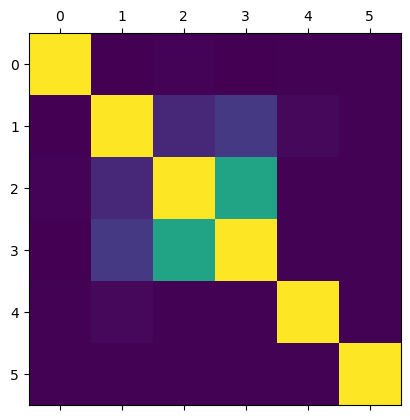

In [51]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

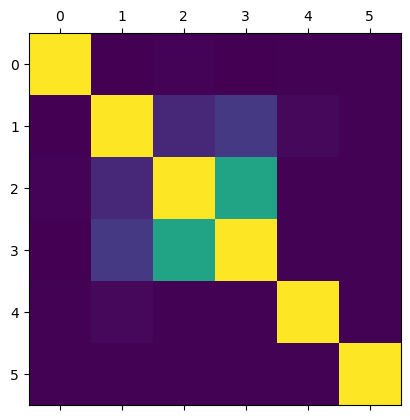

In [52]:
# Save figure
plt.matshow(sub.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
# the next line shows the directory

In [53]:
#current dir
cwd = os.getcwd()
cwd

'/Users/nancykray/Desktop/Real Estate Project/Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

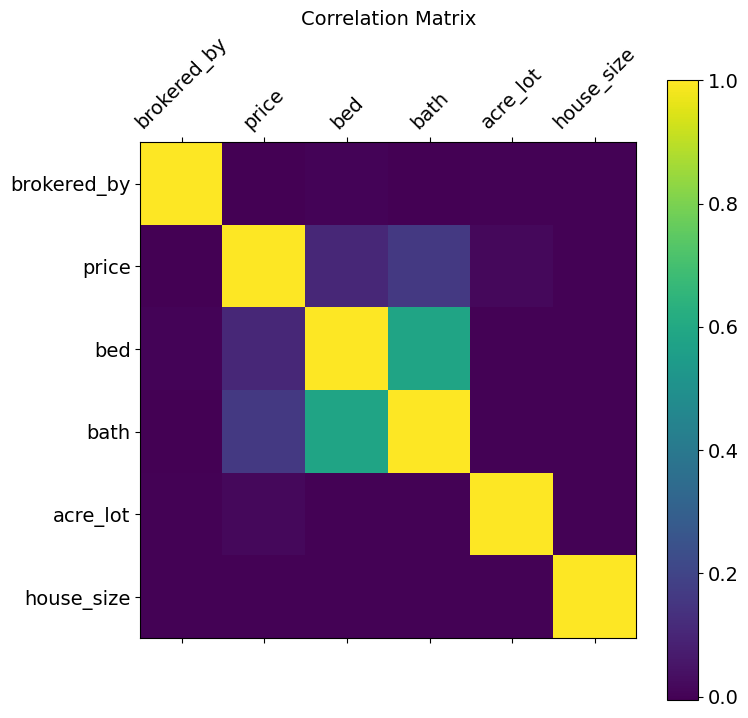

In [54]:
# Add labels, a legend, and change the size of the heatmap (remember that 'df' is now 'sub')

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

this forces you to constantly cross reference the colors in the chart with the legend, leaving the exact correlation coefficients effectively obscure. In order to best interpret the data, let's use a heatmap below:

#### Create a correlation heatmap using seaborn:

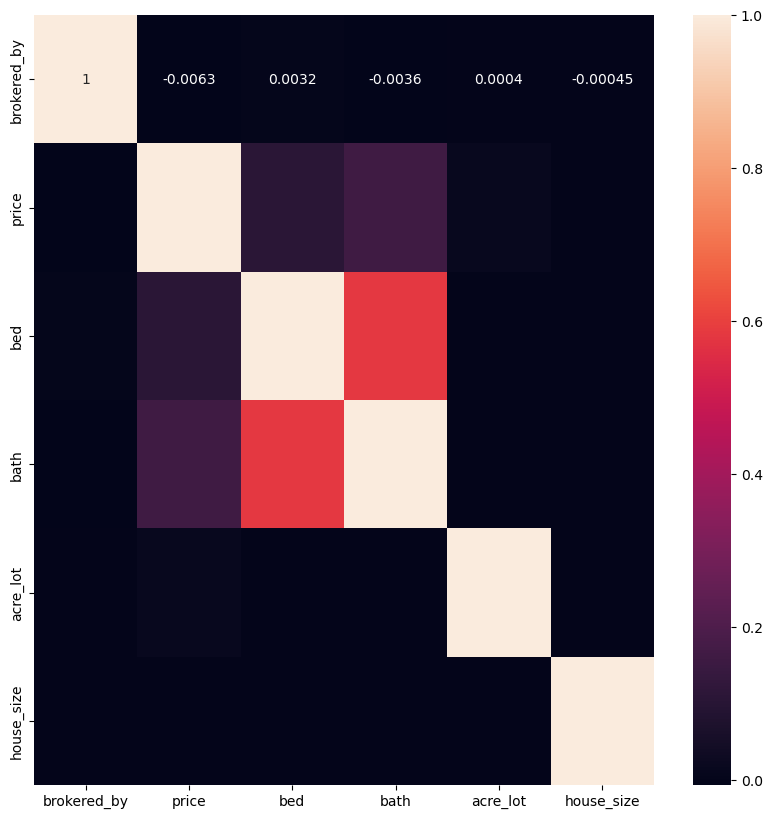

In [55]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

This correlation heatmap shows that strongest relationships are highlighted in red (as this is the lightest color shown besides white and white does not count as these are perfect 1s due to variables crossing paths with themselves) 

These stronger relationships are between number of baths with number of beds.  This makes sense as houses with more bedrooms will likely have more bathrooms.

A weaker correlation (shown in dark purple) is shown between 'price' and 'number of bathrooms'
And weaker yet (darker purple/almost black) is the relationship between 'price' and 'number of bedrooms' 

### Scatterplots

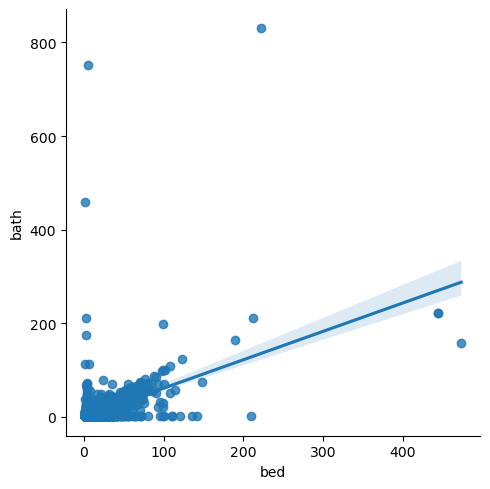

In [56]:
# Create a scatterplot for the "bed" and "bath" columns in seaborn (since these have strongest correlation)

sns.lmplot(x = 'bed', y = 'bath', data = df)

This scatterplot shows the linear trend of a positive correlation between number of bedrooms and number of bathrooms.  There are a few outliers in this dataset shown here as well.

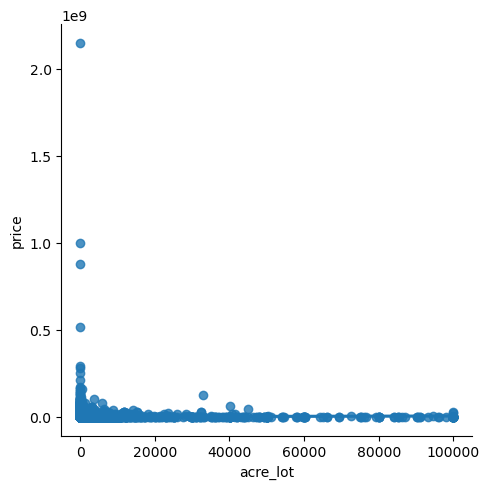

In [28]:
# Create a scatterplot for the "acre_lot" and "price" columns in seaborn (since I want to see what's going on)

sns.lmplot(x = 'acre_lot', y = 'price', data = df)

This scatterplot shows that outliers in 'price' are affecting the ability to see the trend here in this scatterplot. This looks off - like 0 acres has higher price.  Something worth investigating.  I was expecting to see a clear trend/positive correlation for higher prices and bigger acre lot.  This points to looking at the data points where acre_lot=0 since this does not make sense and is likely affecting the analysis of this data.

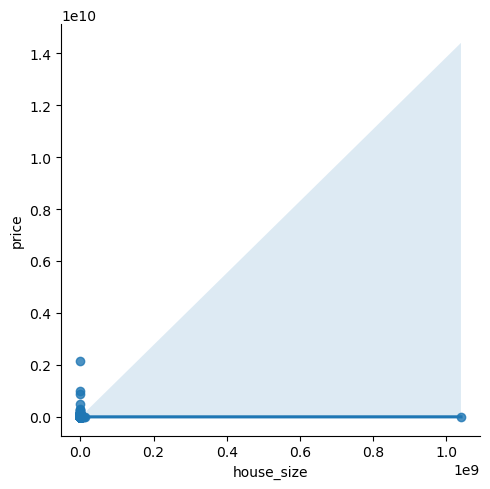

In [12]:
# Create a scatterplot for the "house_size" and "price" columns in seaborn (since I want to see what's going on)

sns.lmplot(x = 'house_size', y = 'price', data = df)

This scatterplot shows the same odd scatter of data points for a "0" house size.  The trend, however suggests that the bigger the house size, the higher the priced (and that makes sense).  Further inveestigation needed for why there are 0s listed for house_size at all.

### Pair plots

In [22]:
# review the columns from 'sub' subset of dataframe to narrow down what I want to keep for the pair plots
sub.columns

Index(['brokered_by', 'price', 'bed', 'bath', 'acre_lot', 'house_size'], dtype='object')

In [23]:
# Keep only the variables you want to use in the pair plot (create another subset dataframe)

sub_2 = sub[['price', 'bed', 'bath', 'acre_lot', 'house_size']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

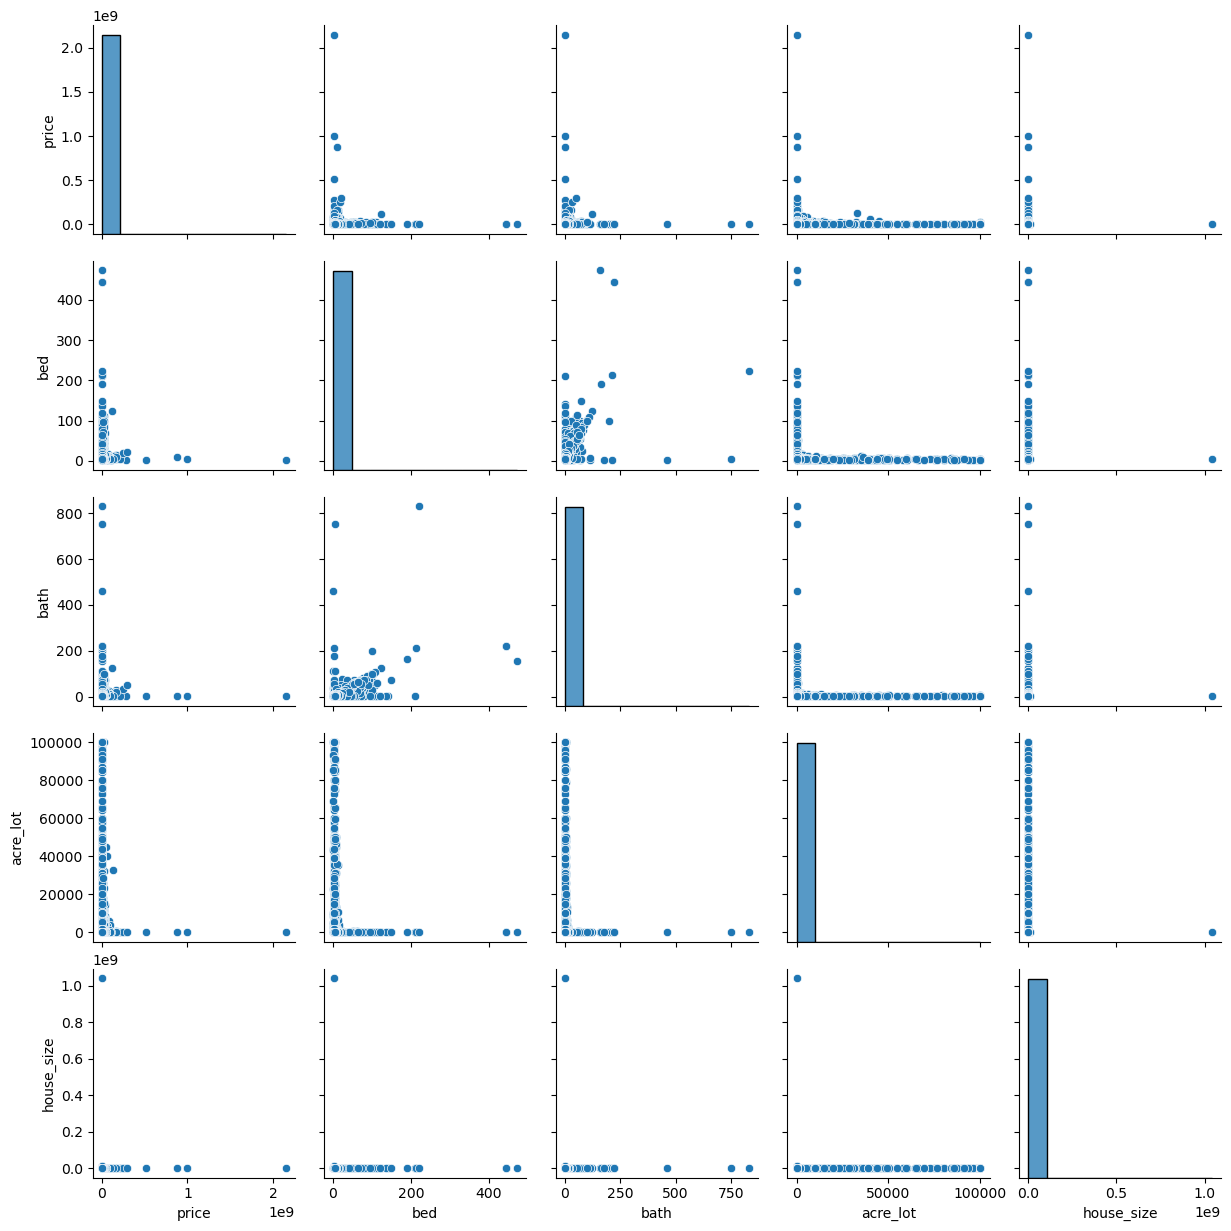

In [24]:
# Create a pair plot (modify bin# - otherwise not executing)
sns.pairplot(sub_2, diag_kws = {'bins': 10})

### Categorical Plots:

##### Creating a categorical variable that splits the "price" column into categories

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

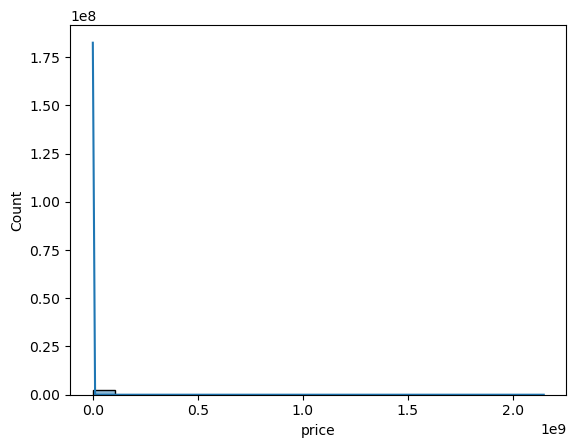

In [22]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['price'], bins = 20, kde = True)

In [21]:
#look at numbers to see the range
sub.describe()

,brokered_by,price,bed,bath,acre_lot,house_size
count,2.220449e+06,2.220449e+06,2.220449e+06,2.220449e+06,2.220449e+06,2.220449e+06
mean,5.293872e+04,5.238686e+05,3.275904e+00,2.496361e+00,1.298420e+01,2.715211e+03
std,3.064365e+04,2.135491e+06,1.388625e+00,1.451307e+00,7.050778e+02,6.983250e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00
25%,2.385900e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.700000e-01,1.456000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.496373e+00,2.600000e-01,2.160000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,6.800000e-01,2.715133e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,1.040400e+09


In [22]:
#check the median since there is such a concentration in the lower range
sub['price'].median()

325000.0

In [23]:
df.loc[df['price'] < .5, 'Price category'] = 'Low price'

In [24]:
df.loc[(df['price'] >= .5) & (df['price'] < 1.0), 'Price category'] = 'Middle price'

In [25]:
df.loc[df['price'] >= 1.0, 'Price category'] = 'High price'

In [26]:
df['Price category'].value_counts(dropna = False)

Price category
High price    2220172
Low price         277
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


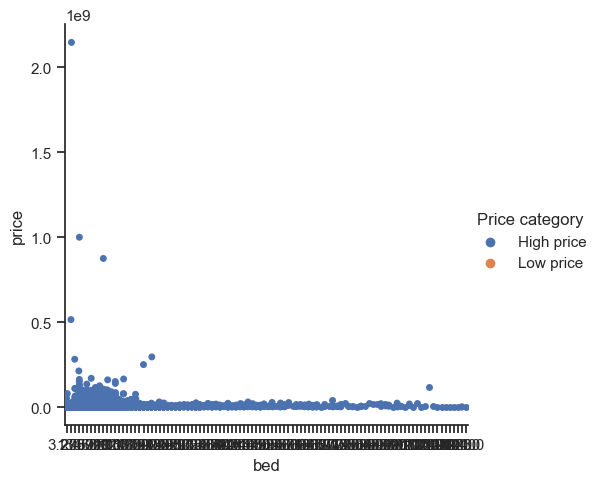

In [27]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style='ticks')
g = sns.catplot(x='bed', y='price', hue='Price category', data=df)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


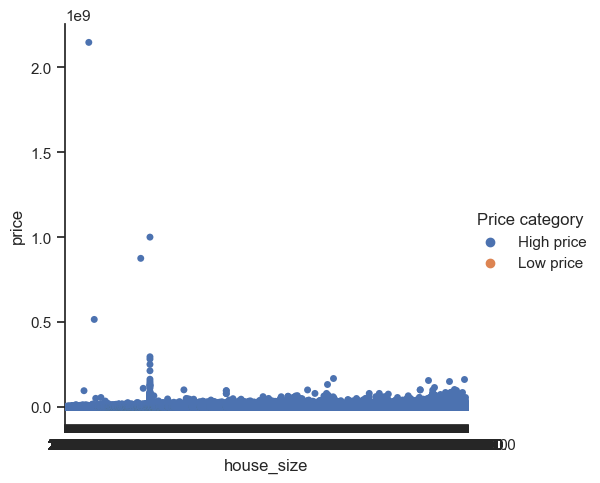

In [28]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style='ticks')
g = sns.catplot(x='house_size', y='price', hue='Price category', data=df)

Through this chart, it is clear that there are a few 'price' outliers, but specifically one that is throwing the whole dataset off.  I am going to choose to remove this and try again to see if things will level out.  Then, I can re-run these pair plots to see if I can get a more clear picture of the rest of the data

In [24]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.220449e+06,2.220449e+06,2.220449e+06,2.220449e+06,2.220449e+06,2.220449e+06,2.220449e+06,2.220449e+06
mean,5.293872e+04,5.238686e+05,3.275904e+00,2.496361e+00,1.298420e+01,1.012380e+06,5.219366e+04,2.715211e+03
std,3.064365e+04,2.135491e+06,1.388625e+00,1.451307e+00,7.050778e+02,5.823318e+05,2.896024e+04,6.983250e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.385900e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.700000e-01,5.088440e+05,2.961100e+04,1.456000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.496373e+00,2.600000e-01,1.012986e+06,4.843300e+04,2.160000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,6.800000e-01,1.518713e+06,7.807000e+04,2.715133e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [30]:
#filter for this really high outlier
low_price= df[df['price'] ==0.0]
print(low_price)

         brokered_by          status  price       bed      bath  acre_lot  \
46191        67948.0        for_sale    0.0  3.275919  2.496373      0.17   
46192        67948.0        for_sale    0.0  3.275919  2.496373      0.22   
49580        92894.0        for_sale    0.0  4.000000  4.000000      0.26   
57766        67929.0        for_sale    0.0  3.275919  2.496373      0.26   
116218       67937.0        for_sale    0.0  3.275919  1.000000      0.26   
...              ...             ...    ...       ...       ...       ...   
1329804      91026.0  ready_to_build    0.0  2.000000  2.496373      0.26   
1329805      91026.0  ready_to_build    0.0  2.000000  2.496373      0.26   
1329809      91026.0  ready_to_build    0.0  2.000000  2.496373      0.26   
1329812      91026.0  ready_to_build    0.0  2.000000  2.496373      0.26   
1329823      91026.0  ready_to_build    0.0  2.000000  2.496373      0.26   

            street         city       state  zip_code  house_size  \
46191 

#### so 277 rows have house price listed as 0

In [44]:
#find outliers listed too high (based of max price number)
outliers= df[df['price'] >=214784140]1


In [45]:
outliers.shape

(7, 12)

In [46]:
#now, create a subset (new dataframe simply leaving these 7 outliers out)
new_df = df[df['price']<214784140]

In [47]:
#check shape
new_df.shape

(2220442, 12)

#### successfully removed since new_df is exactly 7 less rows than original df at the beginning

### Now re-run the charts to see if this creates a more clear picture, starting with the categorical plot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

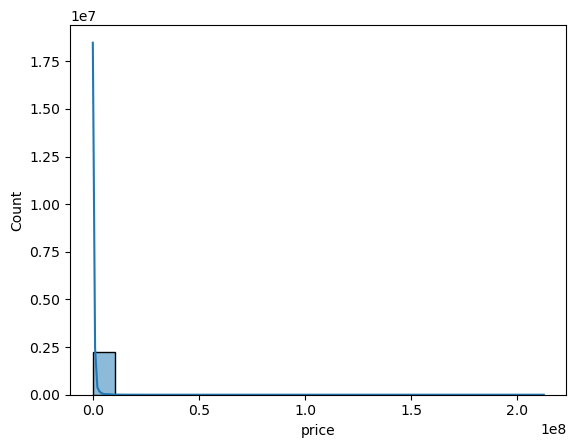

In [40]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(new_df['price'], bins = 20, kde = True)

Hmm, still affected by outliers.  Lets see what happens by further adjusting the dataframe for a few more points

In [71]:
#find outliers listed too high (based of max price number)
outliers_2= df[df['price'] >=100000000]


In [72]:
outliers_2.shape

(28, 12)

In [62]:
#create another subset leaving these 28 outliers out
new_df_2= df[df['price']<100000000]

In [63]:
#check shape of new dataframe to make sure its 28 rows less than prior 
new_df_2.shape

(2220421, 12)

### Now re-run the categorical plot again for outliers_2 dataframe

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

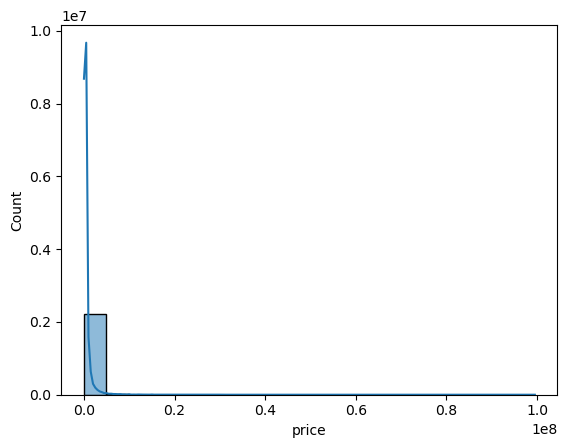

In [64]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(new_df_2['price'], bins = 20, kde = True)

In [74]:
new_df_2.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.220421e+06,2.220421e+06,2.220421e+06,2.220421e+06,2.220421e+06,2.220421e+06,2.220421e+06,2.220421e+06
mean,5.293869e+04,5.202052e+05,3.275801e+00,2.496206e+00,1.296737e+01,1.012378e+06,5.219362e+04,2.715136e+03
std,3.064363e+04,1.138120e+06,1.386129e+00,1.448251e+00,7.047305e+02,5.823312e+05,2.896017e+04,6.983294e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.385900e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.700000e-01,5.088420e+05,2.961100e+04,1.456000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.496373e+00,2.600000e-01,1.012986e+06,4.843300e+04,2.160000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,6.800000e-01,1.518710e+06,7.807000e+04,2.715133e+03
max,1.101420e+05,9.950000e+07,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [158]:
new_df_2.loc[df['price'] < 100000, 'Price category'] = 'Low price'

In [159]:
new_df_2.loc[(df['price'] >= 100000.0) & (df['price'] <= 600000.0), 'Price category'] = 'Middle price'

In [160]:
new_df_2.loc[df['price'] >500000.0, 'Price category'] = 'High price'

In [161]:
new_df_2['Price category'].value_counts(dropna = False)

Price category
Middle price    1240067
High price       626115
Low price        354239
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


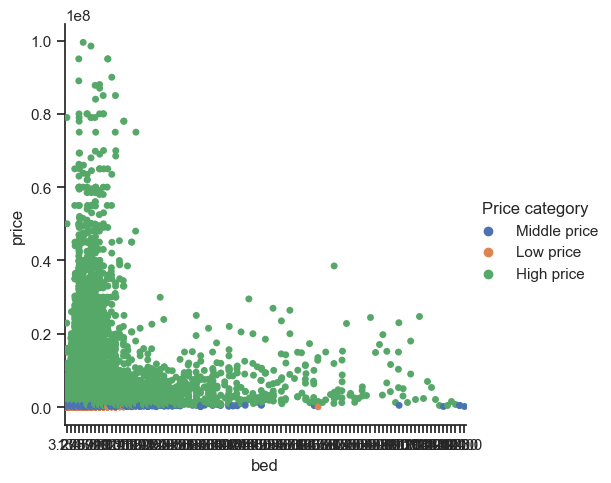

In [162]:
# Create a categorical plot in seaborn using the price categories (compare price and bed)

sns.set(style='ticks')
g = sns.catplot(x='bed', y='price', hue='Price category', data=new_df_2)

In [163]:
# fig = g.get_figure()
g.savefig('cat_plot_bed_price.png') 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

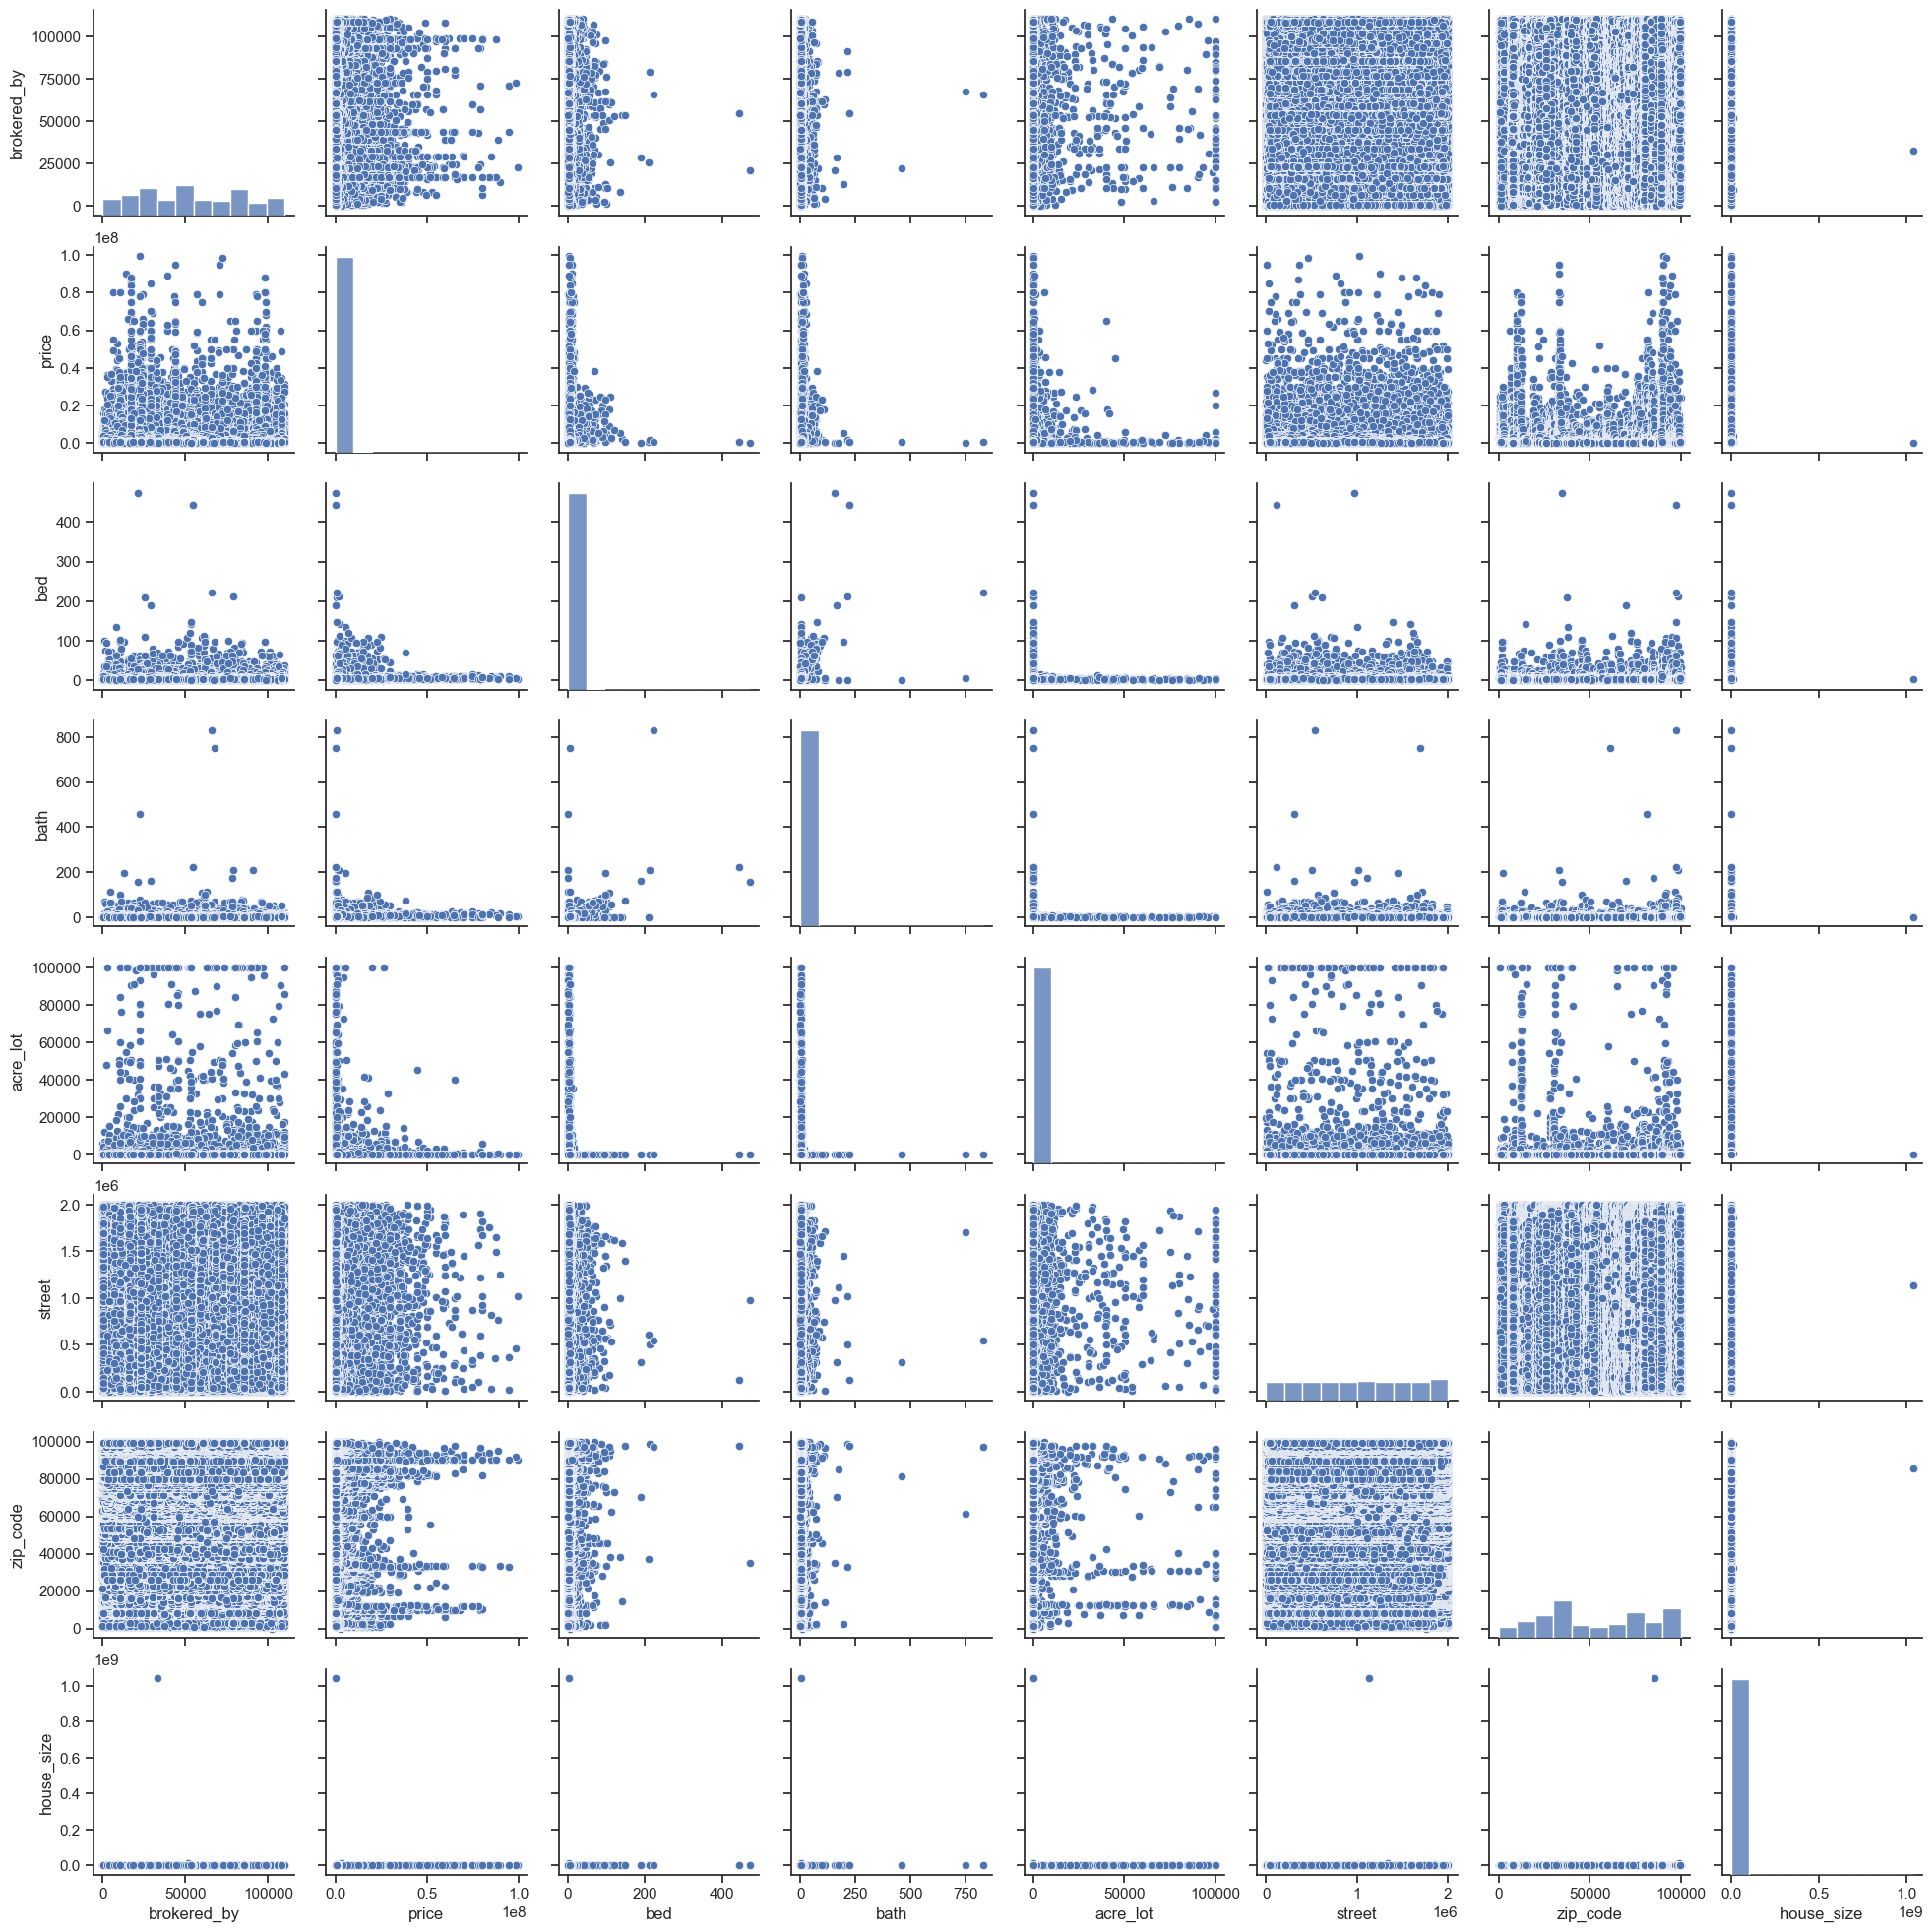

In [165]:
#re-check pairplots (modify bin#)
sns.pairplot(new_df_2, diag_kws = {'bins': 10})

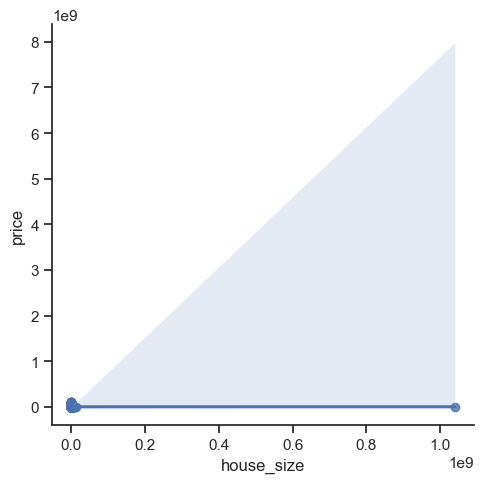

In [166]:
# Re-Create a scatterplot for the "house_size" and "price" columns in seaborn (with adjusted dataframe)

sns.lmplot(x = 'house_size', y = 'price', data = new_df_2)

## Export adjusted data set
with high outliers removed - (0s have not yet been addressed)

In [167]:
new_df_2.to_pickle(os.path.join(path,'Prepared Data', 'df_clean4.pkl'))